# Fundamentals of Data Analysis Tasks - 2023

*by Conor Tierney*

***

## About 
****


fjfjdfjdf

## Import Libraries

*****

In [2]:
#Numerical operations
import numpy as np

# Data frames
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt

# Task 1 - Collatz Conjecture

*******

The Collatz conjecture is a famous unsolved problem in mathematics (ref 1). The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .
This task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.
At each stage of the loop, the program updates the number value based on whether it is even or odd. If the number $x$ is even, divide it by 2. If the number is odd, multiply by 3 and add 1. When number becomes 1, the program ends.


*The following is the code running the Collatz Conjecture.*

In [1]:
def f(x):
    # If x is even, divide it by two.
    if x % 2 == 0:
        return x // 2                      
    # If x is odd, multiply by 3 + 1.
    else:
        return (3 * x) + 1

In [2]:
def collatz(x):
    while x != 1:                                      # while loop executes as long as 'x' is not = 1.
        print (x, end=', ')                            # until x becomes one , keep printing value of x.
        x = f(x)
    print(x) 

*Verify the conjecture for the first 10,000 integers is true.*

In [3]:
collatz(10000)

10000, 5000, 2500, 1250, 625, 1876, 938, 469, 1408, 704, 352, 176, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1


### References:
- 1
- 2
- 2


# Task 2 - Penguins Dataset Overview
*****

The famous Palmer penguin dataset is commonly used in data science and analytics. 
The dataset comprises information on penguins inhabiting the Palmer Archipelago, Antarctica. It features various attributes, including the name of the islands (Torgersen, Biscoe, or Dream), the species (Adelie, Chinstrap, or Gentoo), bill length measurement (mm), bill depth measurement (mm), flipper length (mm), body mass (grams), and the gender of the penguins(1). 
The data was collected and made available by Dr. Kirsten Gorman and Palmer station Antarctica LTER between the period 2007-09(2).
In total 344 samples were collected (however 2 samples have missing structural size measurements).

![Penguins Dataset](https://imgur.com/orZWHly.png)

## Types of Variables in the Penguin Dataset.

NB see here : https://realpython.com/python-data-types/

The dataset contains Categorical and Numerical Variables. Of the 7 columns in the dataset, 3 are categorical (gender, island and species), and 4 are numeric (bill length, bill depth, flipper length and body mass).

The type of variable used to model them in python depends on the specific task or analysis we wish to perform using the dataset. I suggest that for classification tasks, we can use the categorical variables outlined below to classify the penguins into different species based on other features.
The numerical variables are often used for predictive modeling and regression models.(ref).




### **Categorical variables**:

1. *Species: This represents the penguin species and contains 3 categories.*
- Adelie.
- Chinstrap.
- Gentoo.   
  
2. *Islands: Where the penguins were observed. Contains 3 categories.*
- Torgersen.
- Biscoe.
- Dream.   
  
3. *Sex: Gender of the penguins. Contains 2 categories*
- Male.
- Female.

### **Numeric variables**:

1. Bill Length.
2. Bill Depth.
3. Flipper Length.
4. Body Mass (g)


### Investigation of the the Dataset using Pandas.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
# read in the csv file.

In [7]:
print(df)
# show a summary of the penguin dataset.

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [9]:
df.dtypes
# to verify & list the types of data.
# 'object' in Pandas is categorical or text data. 'float64' represents numerical data.


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [14]:
df.head()
# Verify the dataset's structure and variables.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df.describe()         
# to describe the dataframe.

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.mean()          
# These are the means for the 4 numeric variables.

C:\Users\conor\AppData\Local\Temp\ipykernel_13372\3762790996.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

### References:
- https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95
- https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html
- https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris (for penguin image)
- wikipedia : penguin dataset
- https://www.linkedin.com/pulse/penguin-paradox-garima-anand/
- https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d

## End -  Task 2

***

# Task 3
*****

> *Question : For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.*


### Review of the variables in the Penguin Dataset.
The dataset contains Categorical and Numerical Variables. Of the 7 columns in the dataset, 3 are categorical (gender, island and species), and 4 are numeric (bill length, bill depth, flipper length and body mass).

** see lecture slides topic 3 for random distribution **
** see topic 2 for laerd types of variables **

**Body Mass (g)**

The normal distribution is a fair choice for a continuous variable like body mass. It should exhibit a bell shaped curve that is genrally symmetrical.



**Sex**
probability distributions

**Species**

probability distributions?

**Island**
categorical distribution

**Bill Length(mm)**
Normal distribution

**Bill Depth(mm)**
Normal distribution

**Flipper Length(mm)**
Normal distribution

# Task 4: Binomial distribution / Entropy
****

> Task: Suppose you are flipping two coins, each with a probability *p* of
giving heads. Plot the entropy of the total number of heads versus *p*.

### About
The **Binomial distribution** is a statistical probability distribution that models the likelihood of two independent outcomes based on specific assumptions. These assumptions include a single outcome per trial, equal probability of success for each trial, and independence between trials. Widely used in statistics, the binomial distribution is a discrete distribution, contrasting with continuous distributions like the normal distribution [1].

*When flipping 2 coins there are 3 possible outcomes. Heads may appear zero, once or twice in the trial of 2 coin flips. The probability of Heads appearing zero times or twice is less than the likelihood of heads appearing once. This will be displayed below.*

### Probability Theory
**Flipping coins**  
When flipping 2 coins, each has a possible outcome of heads ot tails.

**Entropy**   
Entrop measure the degree of disorder or unprdictability in a system i.e calculating the entropy of the number of heads in a coin toss [2].

### Code

In [18]:
# Flipping 2 coins 10000 times with a probability p= 0.5
flip_coins = np.random.binomial(2, 0.5, 10000)

# Show array.
flip_coins

array([1, 1, 0, ..., 1, 0, 0])

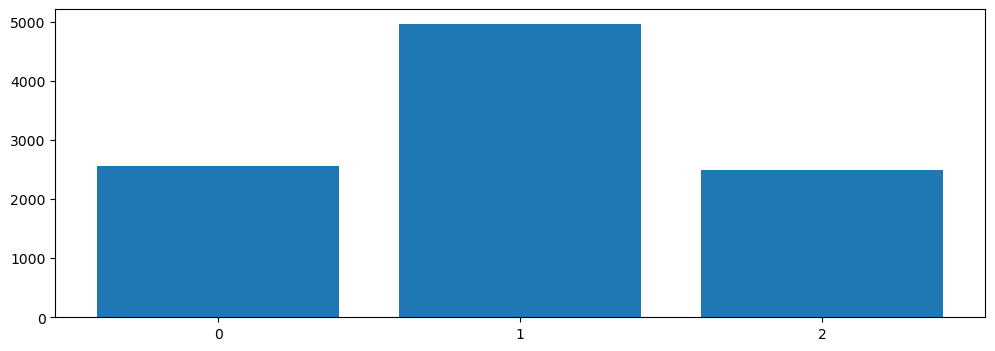

In [19]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Count the unqiue values in the array.
x, counts = np.unique(flip_coins, return_counts=True)

# Create a bar chart of flip_coins.
ax.bar(x, counts)

# Update the x-axis.
ax.set_xticks(x);

**Explanation as to why the above probablities are as they are**:  
*There is twice the chance of getting 1 heads with 2 coin flips. We can see this in the plot. We can see that the probability of getting heads from flipping 2 coins is 50%*  

*Possibilities:*
- heads/ heads (25%)  
- tails/tails (25%)  
- heads/ tails (25%)  
- tails/heads (25%)

### Plotting - Heads vs *p*
Plot the entropy of the total number of heads versus *p*.

In [12]:
# Code the Entropy using numpy.
# Define Entropy as H.
def H(p):
  return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

In [13]:
# If the probability of 1 is half (50%) as we see in plot above
H(0.5)

1.0

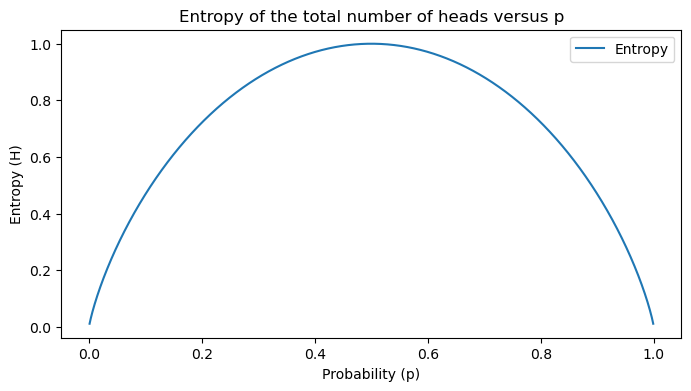

In [17]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(8,4))

# Define a range of probability values for the coin giving heads.
p = np.linspace(0.001, 0.999, 10001)

# Plot H(p).
ax.plot(p, H(p), label ='Entropy');
ax.set_title('Entropy of the total number of heads versus p')
ax.set_xlabel('Probability (p)')
ax.set_ylabel('Entropy (H)')
ax.legend()
plt.show()

## References - Task 4
[1]  [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)  
[2]  [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))  
[3]  [entropy-quantifies-information](https://www.quantamagazine.org/how-claude-shannons-concept-of-entropy-quantifies-information-20220906/)  
[4]  [ATU Course Material](https://vlegalwaymayo.atu.ie/course/view.php?id=8771)   
[5]  [Numpy](https://numpy.org/doc/stable/reference/random/generator.html#distributions)  
[6]   [Binomial Distribution: Definition, Formula, Analysis, and Example](https://www.investopedia.com/terms/b/binomialdistribution.asp#:~:text=Binomial%20distribution%20is%20calculated%20by,and%20the%20number%20of%20trials.ref)  
[7]   [ the degree of disorder or uncertainty in a system](https://www.merriam-webster.com/dictionary/entropy#:~:text=broadly%20%3A%20the%20degree%20of%20disorder,universe%20toward%20death%20and%20disorder.)

## Task 5

*****